<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml10_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 셋

wine 데이터 셋

In [9]:
wine_csv = 'https://bit.ly/wine_csv_data'

In [10]:
wine_df = pd.read_csv(wine_csv)

In [14]:
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [18]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [19]:
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [32]:
class_counts = wine_df['class'].value_counts()
class_counts        #> 0 - red wine, 1 - white wine

,count
class,
1.0,4898
0.0,1599


In [34]:
# class 0, 1에 와인 이름 변환
wine_df['class'] = wine_df['class'].map({0 : 'red wine', 1 : 'white wine'})

## alcohol, sugar, pH 변수들의 히스토그램

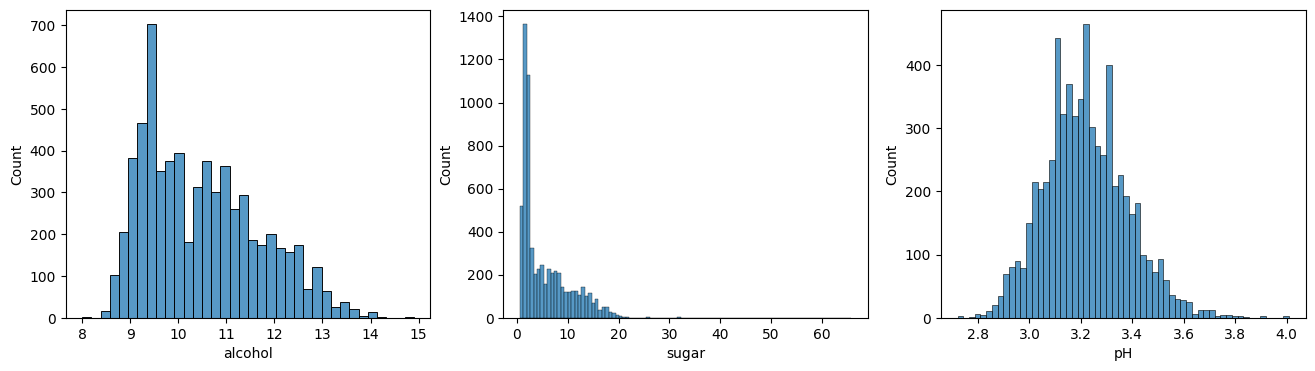

In [43]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

for i, v in enumerate(wine_df.columns[:3]):
    sns.histplot(data=wine_df, x=v, ax=axes[i])

plt.show()

## class 별로 색깔을 다르게 시각화한 pairplot

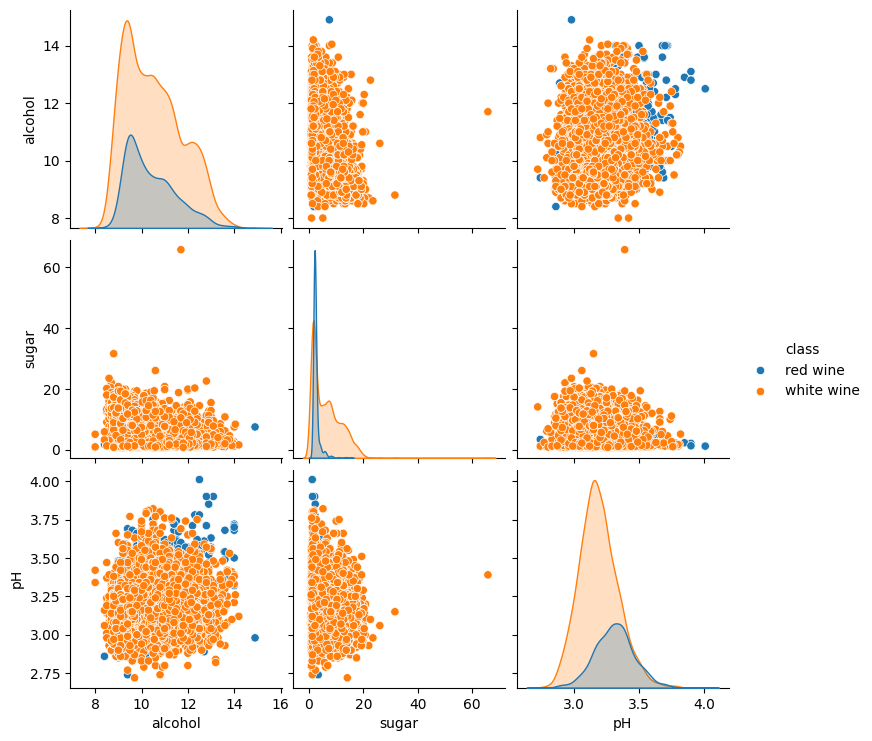

In [36]:
sns.pairplot(wine_df, hue='class')

plt.show()

# 훈련/테스트 셋 나누기

In [50]:
X = wine_df[wine_df.columns[:3]].values # 특성 배열(alcohol, sugar, pH)
y = wine_df['class'].values

In [53]:
X[:5, :]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [54]:
y[:5]

array(['red wine', 'red wine', 'red wine', 'red wine', 'red wine'],
      dtype=object)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [62]:
X_train.shape

(5197, 3)

In [63]:
X_test.shape

(1300, 3)

In [64]:
y_train.shape

(5197,)

In [65]:
y_test.shape

(1300,)

In [66]:
5197/6497

0.7999076496844697

In [67]:
feature_names = wine_df.columns[:3] # 특성 이름
target_names = ['red', 'white'] # 클래스 이름(레이블)

In [68]:
print(feature_names)
print(target_names)

Index(['alcohol', 'sugar', 'pH'], dtype='object')
['red', 'white']


In [75]:
tree_clf = DecisionTreeClassifier(random_state=42)  # 모델 생성

In [76]:
tree_clf.fit(X_train, y_train)  # 모델 훈련

DecisionTreeClassifier(random_state=42)

In [77]:
train_pred = tree_clf.predict(X_train)  # 훈련 셋 예측값

In [78]:
cm_train = confusion_matrix(y_train, train_pred)
cm_train

array([[1276,    3],
       [   8, 3910]])

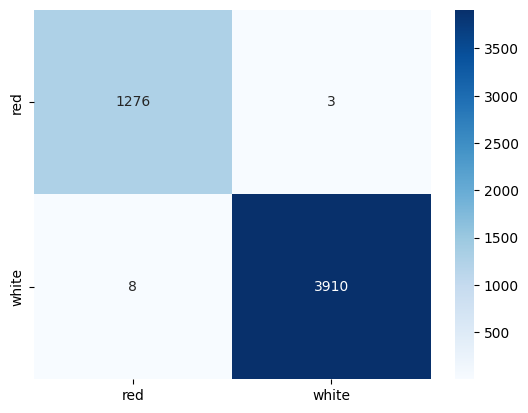

In [79]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.show()

In [80]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

    red wine       0.99      1.00      1.00      1279
  white wine       1.00      1.00      1.00      3918

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



In [81]:
test_pred =  tree_clf.predict(X_test)   # 테스트 셋 예측값

In [82]:
cm_test = confusion_matrix(y_test, test_pred)
cm_test

array([[226,  94],
       [ 81, 899]])

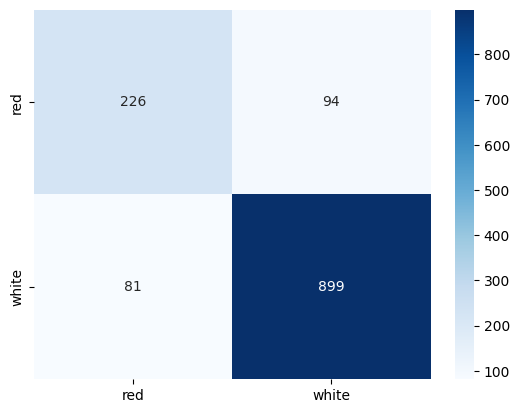

In [83]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.show()

In [84]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

    red wine       0.74      0.71      0.72       320
  white wine       0.91      0.92      0.91       980

    accuracy                           0.87      1300
   macro avg       0.82      0.81      0.82      1300
weighted avg       0.86      0.87      0.86      1300



In [85]:
# 위와 같이 과대적합이 심하고 훈련셋의 정확도는 좋지만 테스트 셋의 정확도가 좋지 않으면
# 규제를 통해 훈련셋의 정확도를 낮추고 테스트 셋의 정확도를 높일 수 있음 + 하이퍼파라미터

Decision Tree는 과대적합이 매우 크다.

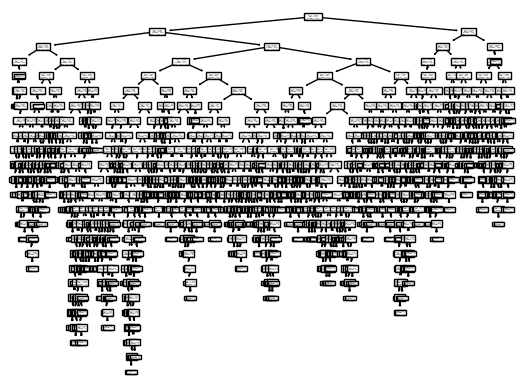

In [87]:
plot_tree(tree_clf)
plt.show()

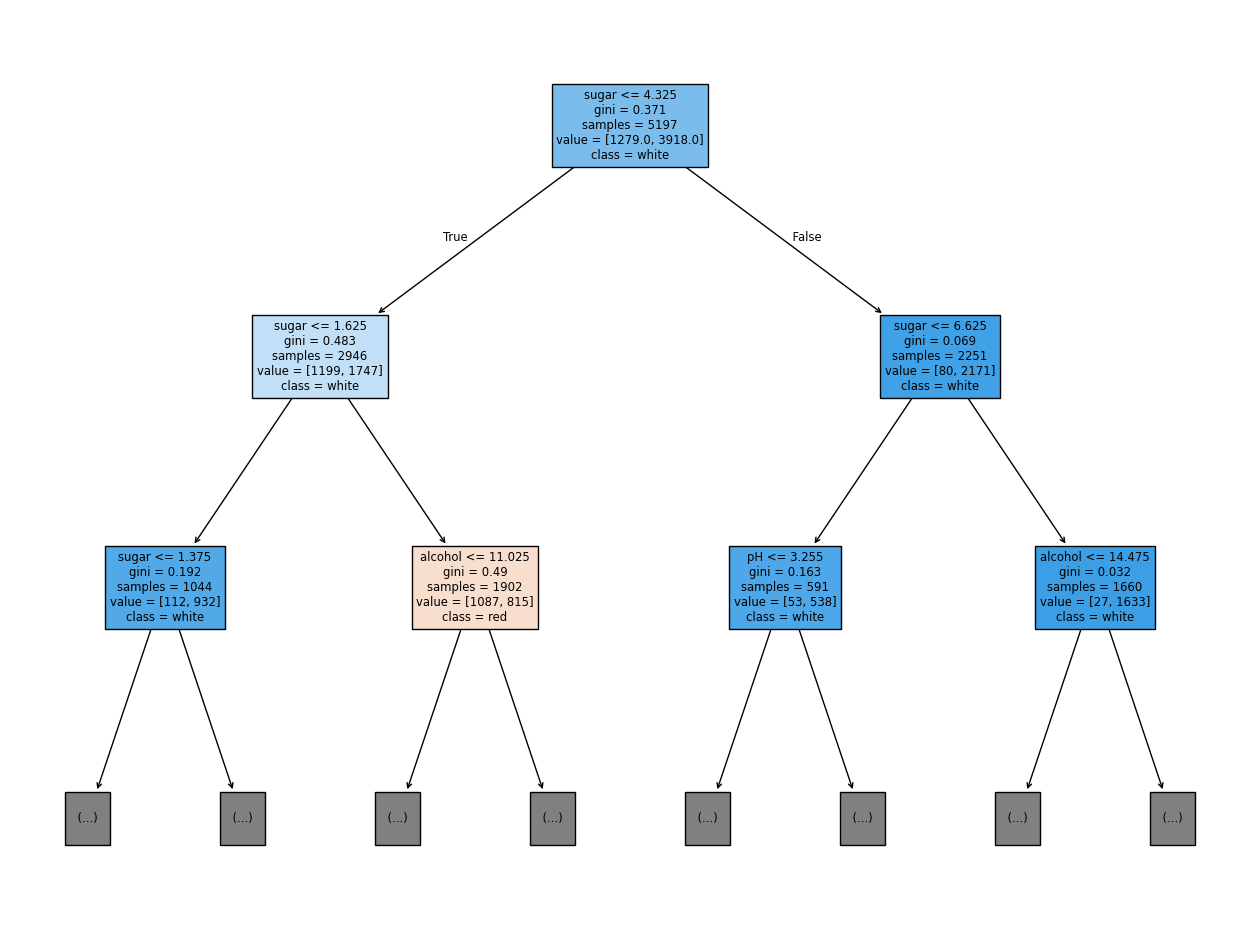

In [91]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2, feature_names=feature_names, class_names=target_names,
          filled=True)

plt.show()

## Decision Tree를 나누는 기준

---

__Gini impurity(불순도)__

$$
Gini = 1 - \sum_i p_i^2
$$

*   $p_i$: $i$번째 클래스가 될 확률
*   이진(binary class) 분류
    *   gini = 1 - ((양성 클래스 확률)^2 + (음성 클래스 확률)^2)
    *   양성과 음성의 비율이 1:1인 경우, gini = 1 - (0.5^2 + 0.5^2) = 0.5. 불순도 최대.
    *   양성 또는 음성으로 완벽하게 분류된 경우, gini = 1 - 1 = 0. 불순도 최소.
*   Decision tree는 부모 노드와 자식 노드의 gini 불순도 차이가 가능한 커지도록 가지를 성장시킴.

---

__Entropy(엔트로피)__

$$
Entropy = -\sum_i p_i \log_k (p_i)
$$

*   $k$: 클래스의 개수(이진 분류인 경우, k=2).
*   $p_i$: $i$번째 클래스가 될 확률.
*   이진 분류
    *   양성과 음성의 비율이 1:1인 경우, Entropy = 1. 엔트로피 최대.
    *   양성 또는 음성으로 완벽히 분류된 경우, Entropy = 0. 엔트로피 최소.
*   Decision tree 객체를 생성할 때 criterion='entropy'라고 설정하면, 부모 노드와 자식 노드에서의 엔트로피 차이가 가능하면 커지도록 가지를 생성함.


## Decision Tree 특징

*   장점:
    *   특성들을 스케일링할 필요가 없다.
    *   결과를 이해하기 쉽다.
*   단점:
    *   과적합(overfitting)되기가 쉽다.
    *   여러가지 규제들을 적용해서 과적합 문제를 해결해야 함.
*   규제 하이퍼 파라미터(hyperparameter) - 생성자의 파라미터들
    *   `max_depth`: decision tree의 최대 깊이.
    *   `max_leaf_node`: leaf node의 최댓값.
    *   `max_features`: 각 노드에서 분할에 사용할 특성의 최대 개수.
    *   `min_samples_split`: 노드가 분할되기 위해서 가져야 할 최소 샘플 개수.
    *   `min_samples_leaf`: leaf 노드가 가져야 할 최소 샘플 개수.
    *   `max_`로 시작하는 파라미터의 값을 증가시키면, 트리의 크기가 커짐.
        *   규제가 작아짐.
        *   overfitting이 커짐.
    *   `max_`로 시작하는 파라미터 값을 감소시키면, 트리의 크기가 작아지기 때문에 overfitting이 작아짐.
    *   `min_`으로 시작하는 파라미터 값을 증가시키면, 트리의 크기가 작아짐.
    